1. Read the file in pandas and create 3 data frames; one for each
2. Remove any data that is not read correctly (you may have to figure out which ones are..)
3. Convert the interval column to minutes
4. Compare the three data frames by date; that's find the average for unique dates from each data frame then compare graphically the three-This one is a little hard one, but give it your best shot.

In [3]:
import pandas as pd
castle = pd.read_excel('./project3data.xlsx', sheet_name=0)
daisy = pd.read_excel('./project3data.xlsx', sheet_name=1)
grand = pd.read_excel('./project3data.xlsx', sheet_name=2)

In [4]:
castle = castle[['Date', 'Time', 'Interval']]
daisy = daisy[['Date', 'Time', 'Interval']]
grand = grand[['Date', 'Time', 'Interval']]

In [5]:
castle.head()

,Date,Time,Interval
0,1905-07-01,Castle,Geyser
1,NaT,2011,Castle
2,2004-07-07,17:00:31,1110:06:31
3,2004-12-05,15:00:00,872:37:00
4,1999-06-16,09:52:00,787:59:00


In [30]:
from datetime import time
def clean_sheet(df):
    df['DT'] = pd.to_datetime(df['Date'].astype(str) + " " + df['Time'].astype(str))
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.date
    df['Time'] = pd.to_datetime(df['Time'],format= '%H:%M:%S', errors='coerce').dt.time
    df['Interval'] = pd.to_timedelta(df['Interval'], errors='coerce')
    df['interval_minutes'] = pd.to_numeric(df['Interval'].dt.seconds / 60)
    return df.dropna()

castle = clean_sheet(castle)
daisy = clean_sheet(daisy)
grand = clean_sheet(grand)

In [31]:
castle.head(1)

,Date,Time,Interval,interval_minutes,label,DT
2,2004-07-07,17:00:31,46 days 06:06:31,366.516667,Castle,2004-07-07 17:00:31


In [8]:
daisy.head(1)

,Date,Time,Interval,interval_minutes
0,1999-09-10,08:41:32,23 days 15:54:43,954.716667


In [9]:
grand.head(1)

,Date,Time,Interval,interval_minutes
0,2010-05-22,00:00:00,0 days 09:29:48,569.8


In [35]:
intervals = [x[['Date', 'DT', 'interval_minutes']] for x in [castle, daisy, grand]]
averaged = pd.concat(intervals)
averaged = averaged.groupby('Date', as_index=False).mean().reset_index()

In [36]:
castle['label'] = 'Castle'
daisy['label'] = 'Daisy'
grand['label'] = 'Grand'
averaged['label'] = 'Average'

In [43]:
combined = pd.concat([castle, daisy, grand, averaged])[['Date', 'interval_minutes', 'label', 'DT']]
combined['Month'] = combined['DT'].dt.month

In [38]:
(combined['Date'].min(),
combined['Date'].max(), len(combined['Date']))

(datetime.date(1997, 9, 5), datetime.date(2011, 8, 17), 66195)

In [39]:
combined

,Date,interval_minutes,label,DT
2,2004-07-07,366.516667,Castle,2004-07-07 17:00:31.000000000
3,2004-12-05,517.000000,Castle,2004-12-05 15:00:00.000000000
4,1999-06-16,1199.000000,Castle,1999-06-16 09:52:00.000000000
5,2003-11-17,540.383333,Castle,2003-11-17 21:45:13.000000000
6,1998-09-07,336.000000,Castle,1998-09-07 12:50:00.000000000
...,...,...,...,...
4486,2011-08-13,273.808333,Average,2011-08-13 12:42:39.250000128
4487,2011-08-14,286.169231,Average,2011-08-14 10:33:20.538461696
4488,2011-08-15,270.153333,Average,2011-08-15 11:43:55.999999744
4489,2011-08-16,309.741667,Average,2011-08-16 12:16:35.749999872


In [55]:
combined.groupby(['label'])[['label','interval_minutes']].describe()

interval_minutes                                                  \
                   count        mean         std  min         25%    50%   
label                                                                      
Average           4491.0  345.694702  151.291558  0.0  261.350649  305.6   
Castle            8112.0  701.292174  198.304024  0.0  698.000000  770.0   
Daisy            42456.0  155.246533   45.325394  0.0  133.000000  148.0   
Grand            11136.0  528.908294  114.617226  0.0  441.075000  517.0   

                             
                75%     max  
label                        
Average  350.310096  1086.0  
Castle   814.000000  1309.0  
Daisy    169.000000  1422.0  
Grand    599.500000  1422.8

In [76]:
print("IQR by dataset:")
for label, df in combined.groupby(['label']):
    quartiles = df['interval_minutes'].quantile([.25, .75])
    print(f"  {label[0]}: {quartiles[.75] - quartiles[.25]}")

IQR by dataset:
  Average: 88.95944680319684
  Castle: 116.0
  Daisy: 36.0
  Grand: 158.42499999999995


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

combined['Date'] = pd.to_datetime(combined['Date'])  # Convert to datetime if necessary
combined['interval_minutes'] = pd.to_numeric(combined['interval_minutes'], errors='coerce')

combined = combined.dropna(subset=['interval_minutes'])

df_resampled = combined.groupby('label').resample('W', on='Date').mean().reset_index()

This is the same data as at the bottom, but grouped by weeks to be a bit clearer. There's just too much data across too large a time frame to understand the individual data points otherwise.


Text(0, 0.5, 'Interval (minutes)')

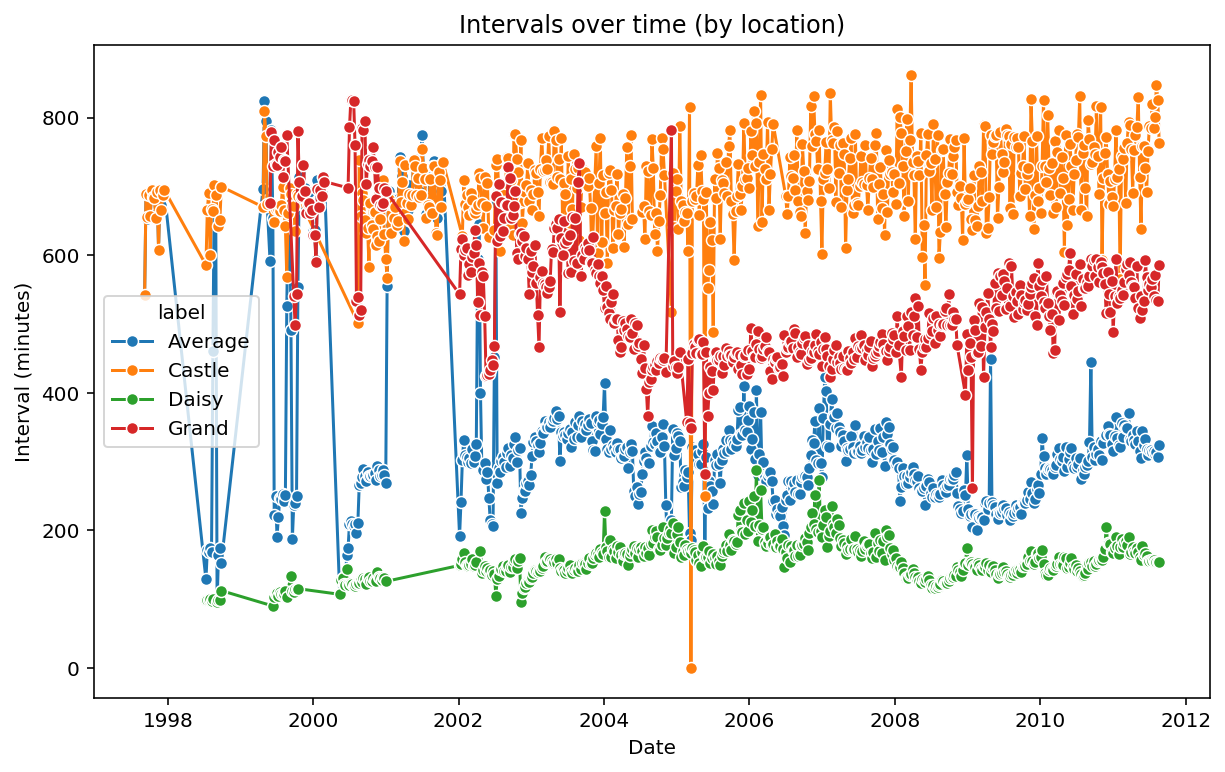

In [20]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='interval_minutes', hue='label', data=df_resampled, marker="o")

# Add titles and labels
plt.title('Intervals over time (by location)')
plt.xlabel('Date')
plt.ylabel('Interval (minutes)')

Text(0, 0.5, 'Interval (minutes)')

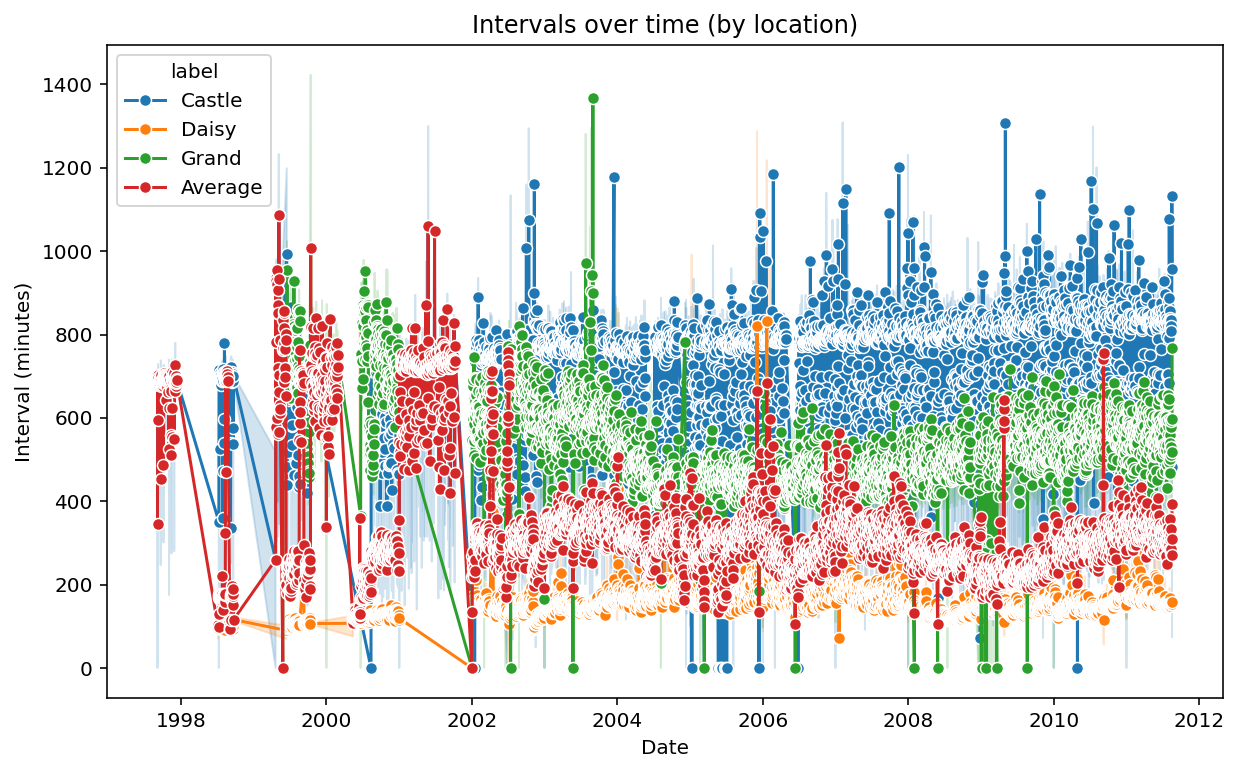

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='interval_minutes', hue='label', data=combined, marker="o")

# Add titles and labels
plt.title('Intervals over time (by location)')
plt.xlabel('Date')
plt.ylabel('Interval (minutes)')